# Building your own panaroma

Import some functions that we will be using - check the readme file for help with downloading libraries.

In [6]:
# to import the print function for python 
from __future__ import print_function
import random 

# Numpy is the main package for scientific computing with Python. 
import numpy as np
# to check the efficiency of the code - if needed
import time
# Matplotlib is important for plotting in python.
import matplotlib.pyplot as plt

# It ensures that the drawings are shown in the
# notebook rather instead of opening in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# This is to ensure that the notebook reloads external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We first load images, we are wokring with. 
I'll name them image1, image2 and image3.

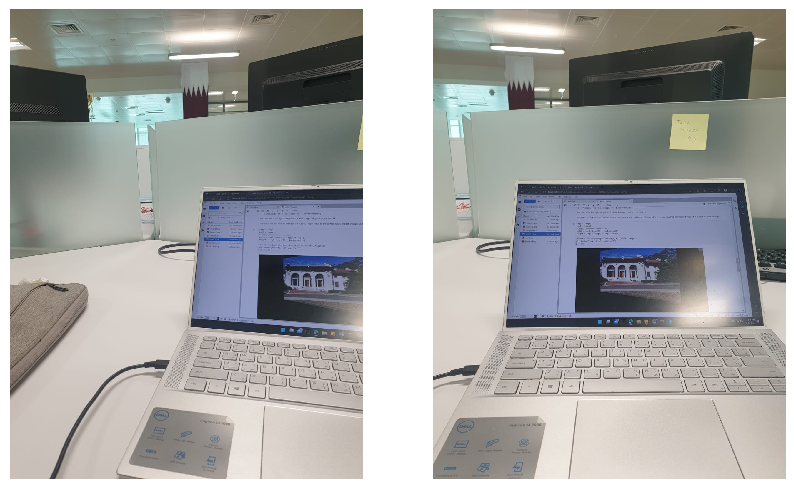

In [31]:
from imageManip import *
#imageManip contains the function load
image1_path = './image1.jpg'
image2_path = './image2.jpeg'


image1 = load(image1_path)
image2 = load(image2_path)


plt.subplot(121); plt.imshow(image1); plt.axis('off');
plt.subplot(122); plt.imshow(image2); plt.axis('off');


plt.show()

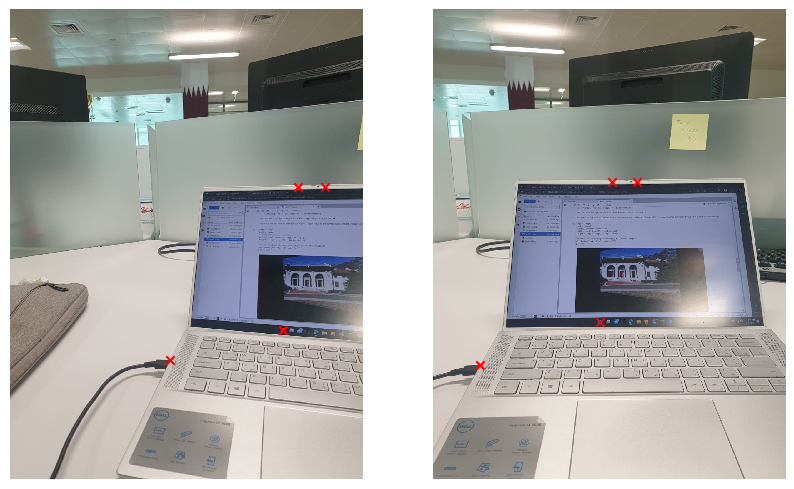

In [32]:
# key points in left image (1)
im1_xy = np.array([[ 543, 1195],
               [ 981, 606],
               [ 1074, 605],
               [ 928, 1092]])
   
# key points in right image (2)
im2_xy = np.array([[  159, 1211],
                 [ 611, 589],
                 [ 696, 589],
                 [ 568, 1065]])

# note that points should be ordered
# im1_xy[0] corresponds to im2_xy[0], ...

# show the key points in both 
plt.subplot(121); plt.imshow(image1); plt.axis('off');
plt.scatter(im1_xy[:,0], im1_xy[:,1], marker='x', color='r');
plt.subplot(122); plt.imshow(image2); plt.axis('off');
plt.scatter(im2_xy[:,0], im2_xy[:,1], marker='x', color='r');
plt.show()

In [33]:
import cv2
H = cv2.getPerspectiveTransform(im2_xy.astype(np.float32), im1_xy.astype(np.float32))
print(H)

[[ 8.36643300e-01  6.05040603e-02  3.74231383e+02]
 [-1.18424765e-01  1.05319975e+00  2.09940754e+01]
 [-1.77485827e-04  8.03738580e-05  1.00000000e+00]]


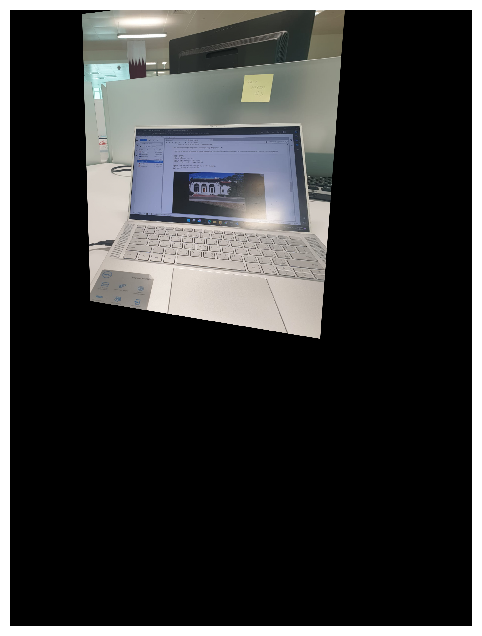

In [34]:
img1 = image1
img2 = image2
# Apply panorama correction
width = img1.shape[1] + img2.shape[1]
height = img1.shape[0] + img2.shape[0]

result = cv2.warpPerspective(img2, H, (width, height))
plt.imshow(result); plt.axis('off')
plt.show()

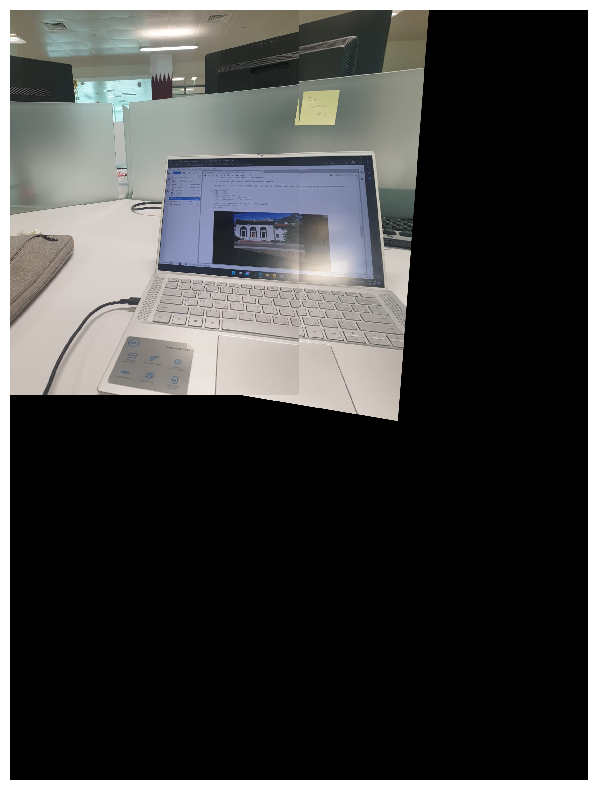

In [35]:
result[0:img1.shape[0], 0:img1.shape[1]] = img1

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.axis('off')
plt.show()